Estadisticas 

In [1]:
import numpy as np # Operaciones matemáticas eficientes, manipulación de arrays y álgebra lineal
import pandas as pd # Manipulación de datos, análisis, limpieza, filtrado y agregación de grandes conjuntos de datos
import geopandas as gpd # Procesar datos geográficos (shapefiles, mapas) y crear visualizaciones geoespaciales como mapas
import matplotlib.ticker as mticker # Formatear y personalizar las etiquetas de los ejes en gráficos
import matplotlib.pyplot as plt # Crear gráficos y visualizaciones como histogramas, gráficos de líneas, dispersión, etc
from matplotlib.colors import Normalize # Ajustar los valores de una variable a un rango predefinido en gráficos
import seaborn as sns # Visualización de datos con gráficos estadísticos como mapas de calor, gráficos de violín, diagramas de dispersión, etc.
import scipy.stats as stats # Estadísticas y funciones de probabilidad (pruebas t, ANOVA, normalidad, correlaciones, etc.)

from scipy.stats import norm # Generar y trabajar con distribuciones normales, ajustar distribuciones a los datos
from scipy.stats import shapiro, kstest # Evaluar si un conjunto de datos sigue una distribución norma
from scipy.stats import levene # Prueba estadística para evaluar la igualdad de varianzas entre grupos
from scipy.stats import kruskal # Comparar distribuciones de varios grupos cuando no se cumple la normalidad

In [2]:
dataset = pd.read_csv('C:/Users/user/Desktop/Machine-Learning/datos_pobreza.csv', encoding='cp1252')

In [3]:
# Crear una copia del dataset original
dataset_copia = dataset.copy()

In [4]:
dataset_copia.head()

,Entidad Federativa,Poblacion,Nacimientos,Defunciones,Muertes Fetales,Muertes Maternas,Poblacion asegurada,Personas pobreza,Personas en pobreza extrema,Coeficiente GINI,Habitaciones por persona,Satisfacción con tiempo para ocio,Niveles de educación
0,AGS,1453452,21050,9712,341,10,794415,351529,15649,0.403162,1.1,7.8,48.2
1,BC,3690160,45075,28596,660,31,2298693,848437,59299,0.354443,1.1,7.8,49.6
2,BCS,821059,9867,5925,111,6,501431,151742,12583,0.372873,1.0,7.9,52.3
3,CAMP,1017011,12365,7509,158,9,487333,440423,93046,0.406862,0.9,7.8,44.6
4,COAH,3261259,44410,23814,501,27,2284366,691129,44529,0.368339,1.2,8.1,48.6


In [5]:
# Mostrar los nombres de las columnas del dataset
print(dataset_copia.columns)

Index(['Entidad Federativa', 'Poblacion', 'Nacimientos', 'Defunciones',
       'Muertes Fetales', 'Muertes Maternas', 'Poblacion asegurada',
       'Personas pobreza', 'Personas en pobreza extrema', 'Coeficiente GINI',
       'Habitaciones por persona', 'Satisfacción con tiempo para ocio',
       'Niveles de educación'],
      dtype='object')


In [6]:
# Obtener estadísticas descriptivas para todas las variables numéricas
descripcion = dataset.describe()

# Mostrar las estadísticas descriptivas
print(descripcion)

          Poblacion    Nacimientos    Defunciones  Muertes Fetales  \
count  3.200000e+01      32.000000      32.000000        32.000000   
mean   4.030389e+06   51146.812500   34691.312500       718.062500   
std    3.364755e+06   38761.322056   31328.675719       791.735535   
min    7.972450e+05    9099.000000    5925.000000       111.000000   
25%    1.853814e+06   24962.250000   14644.750000       303.750000   
50%    3.151482e+06   40096.500000   25151.500000       461.500000   
75%    5.064805e+06   74376.750000   41501.250000       764.250000   
max    1.760343e+07  193476.000000  152090.000000      4356.000000   

       Muertes Maternas  Poblacion asegurada  Personas pobreza  \
count         32.000000         3.200000e+01      3.200000e+01   
mean          34.656250         1.837323e+06      1.638309e+06   
std           28.111081         1.591220e+06      1.619376e+06   
min            3.000000         4.308880e+05      1.517420e+05   
25%           14.500000         8.53102

In [7]:
# List of columns to plot
columns_to_plot = ['Poblacion', 'Nacimientos', 'Defunciones', 'Muertes Fetales', 
                   'Muertes Maternas', 'Poblacion asegurada', 'Personas pobreza', 
                   'Personas en pobreza extrema', 'Coeficiente GINI', 'Habitaciones por persona', 
                   'Satisfacción con tiempo para ocio','Niveles de educación']

In [8]:
# Mostrar los nombres de las columnas del dataset
print(dataset_copia['Coeficiente GINI'])

0     0.403162
1     0.354443
2     0.372873
3     0.406862
4     0.368339
5     0.354837
6     0.412933
7     0.422289
8     0.407914
9     0.370328
10    0.357116
11    0.411295
12    0.376711
13    0.354532
14    0.362841
15    0.394448
16    0.389073
17    0.400639
18    0.385904
19    0.423615
20    0.375419
21    0.370047
22    0.367857
23    0.394103
24    0.366598
25    0.385738
26    0.392793
27    0.373671
28    0.336655
29    0.395967
30    0.395469
31    0.389064
Name: Coeficiente GINI, dtype: float64


In [9]:
# Cargar el shapefile de los estados de México
shapefile_path = "C:/Users/user/Desktop/Descargas 2024/dest2019gw/dest2019gw.shp"  # Ajusta esta ruta al lugar donde guardaste el shapefile
mexico_map = gpd.read_file(shapefile_path)

In [10]:
# Revisar las columnas de ambos DataFrames para unir
print(mexico_map.columns)
print(dataset_copia.columns)

Index(['CVE_ENT', 'NOM_ENT', 'CVE_CAP', 'NOM_CAP', 'AREA', 'PERIMETER', 'COV_',
       'COV_ID', 'geometry'],
      dtype='object')
Index(['Entidad Federativa', 'Poblacion', 'Nacimientos', 'Defunciones',
       'Muertes Fetales', 'Muertes Maternas', 'Poblacion asegurada',
       'Personas pobreza', 'Personas en pobreza extrema', 'Coeficiente GINI',
       'Habitaciones por persona', 'Satisfacción con tiempo para ocio',
       'Niveles de educación'],
      dtype='object')


In [11]:
# Asegúrate de que los nombres de los estados coincidan en ambos DataFrames
mexico_map['NOM_ENT'] = mexico_map['NOM_ENT'].str.upper()  # Convertir los nombres a mayúsculas si es necesario
dataset_copia['Entidad Federativa'] = dataset_copia['Entidad Federativa'].str.upper()

In [12]:
# Unir el shapefile con el dataset de pobreza
merged_data = mexico_map.set_index('NOM_ENT').join(dataset_copia.set_index('Entidad Federativa'))

In [13]:
# Ver los nombres de los estados en el shapefile
print(mexico_map['NOM_ENT'])

0                      AGUASCALIENTES
1                     BAJA CALIFORNIA
2                 BAJA CALIFORNIA SUR
3                            CAMPECHE
4                COAHUILA DE ZARAGOZA
5                              COLIMA
6                             CHIAPAS
7                           CHIHUAHUA
8                   CIUDAD DE MÃ©XICO
9                             DURANGO
10                         GUANAJUATO
11                           GUERRERO
12                            HIDALGO
13                            JALISCO
14                            MÃ©XICO
15               MICHOACÃ¡N DE OCAMPO
16                            MORELOS
17                            NAYARIT
18                        NUEVO LEÃ³N
19                             OAXACA
20                             PUEBLA
21                         QUERÃ©TARO
22                       QUINTANA ROO
23                   SAN LUIS POTOSÃ­
24                            SINALOA
25                             SONORA
26          

In [14]:
# Ver los nombres de los estados en el dataset
print(dataset['Entidad Federativa'])

0      AGS
1       BC
2      BCS
3     CAMP
4     COAH
5      COL
6     CHIS
7      CHI
8     CDMX
9      DGO
10     GTO
11     GRO
12     HGO
13     JAL
14     MEX
15    MICH
16     MOR
17     NAY
18      NL
19     OAX
20     PUE
21     QRO
22    QROO
23     SLP
24     SIN
25     SON
26     TAB
27    TAMP
28    TLAX
29     VER
30     YUC
31     ZAC
Name: Entidad Federativa, dtype: object


In [15]:
# Crear un diccionario de correspondencia para corregir manualmente
correcciones = {
    'AGS': 'AGUASCALIENTES',
    'BC': 'BAJA CALIFORNIA',
    'BCS': 'BAJA CALIFORNIA SUR',
    'CAMP': 'CAMPECHE',
    'COAH': 'COAHUILA DE ZARAGOZA',
    'COL': 'COLIMA',
    'CHIS': 'CHIAPAS',
    'CHI': 'CHIHUAHUA',
    'CDMX': 'CIUDAD DE MÃ©XICO',
    'DGO': 'DURANGO',
    'GTO': 'GUANAJUATO',
    'GRO': 'GUERRERO',
    'HGO': 'HIDALGO',
    'JAL': 'JALISCO',
    'MEX': 'MÃ©XICO',
    'MICH': 'MICHOACÃ¡N DE OCAMPO',
    'MOR': 'MORELOS',
    'NAY': 'NAYARIT',
    'NL': 'NUEVO LEÃ³N',
    'OAX': 'OAXACA',
    'PUE': 'PUEBLA',
    'QRO': 'QUERÃ©TARO',
    'QROO': 'QUINTANA ROO',
    'SLP': 'SAN LUIS POTOSÃ­',
    'SIN': 'SINALOA',
    'SON': 'SONORA',
    'TAB': 'TABASCO',
    'TAMP': 'TAMAULIPAS',
    'TLAX': 'TLAXCALA',
    'VER': 'VERACRUZ DE IGNACIO DE LA LLAVE',
    'YUC': 'YUCATÃ¡N',
    'ZAC': 'ZACATECAS',
    # Agregar más correcciones si es necesario
}

# Aplicar las correcciones al dataset
dataset['Entidad Federativa'] = dataset['Entidad Federativa'].replace(correcciones)

In [16]:
# Unir el shapefile con el dataset de pobreza usando el nombre de las entidades
merged_data = mexico_map.set_index('NOM_ENT').join(dataset.set_index('Entidad Federativa'))

In [17]:
# Mostrar los últimos 10 registros del DataFrame
print(merged_data.tail(10))

                                CVE_ENT  CVE_CAP                    NOM_CAP  \
NOM_ENT                                                                       
QUINTANA ROO                         23    40001                   Chetumal   
SAN LUIS POTOSÃ­                     24   280001           San Luis PotosÃ­   
SINALOA                              25    60001          CuliacÃ¡n Rosales   
SONORA                               26   300001                 Hermosillo   
TABASCO                              27    40001               Villahermosa   
TAMAULIPAS                           28   410001            Ciudad Victoria   
TLAXCALA                             29   330001  Tlaxcala de XicohtÃ©ncatl   
VERACRUZ DE IGNACIO DE LA LLAVE      30   870001           Xalapa-EnrÃ­quez   
YUCATÃ¡N                             31   500001                    MÃ©rida   
ZACATECAS                            32   560001                  Zacatecas   

                                         AREA    PE

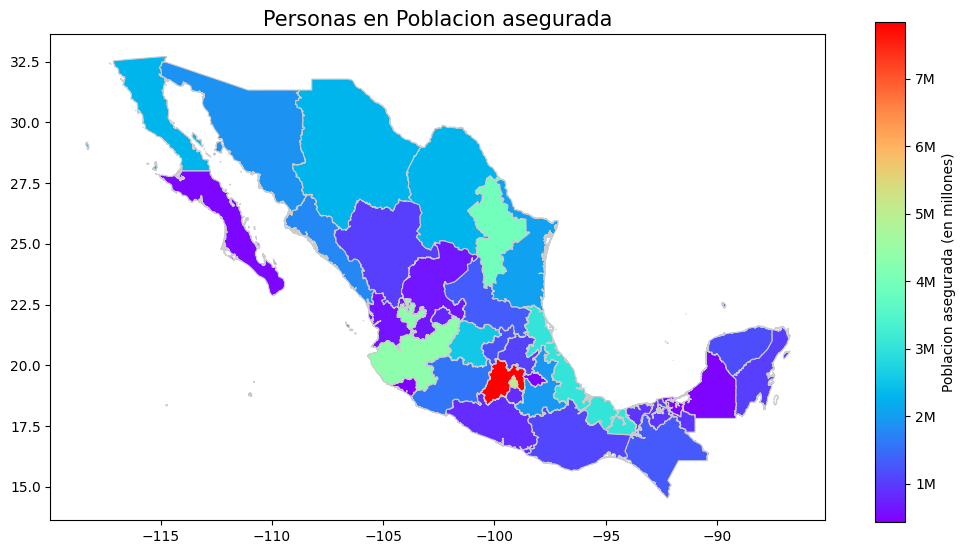

In [18]:
# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.95, 0.25, 0.03, 0.5])  # Ajustar el tamaño de la barra de color
mapa = merged_data.plot(column="Poblacion asegurada", cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Añadir un formateador a la barra de color para mostrar millones (M)
colorbar = mapa.get_figure().colorbar(mapa.collections[0], cax=cax)
colorbar.set_label('Poblacion asegurada (en millones)')
colorbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

# Añadir título
ax.set_title('Personas en Poblacion asegurada', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar el mapa
plt.show()

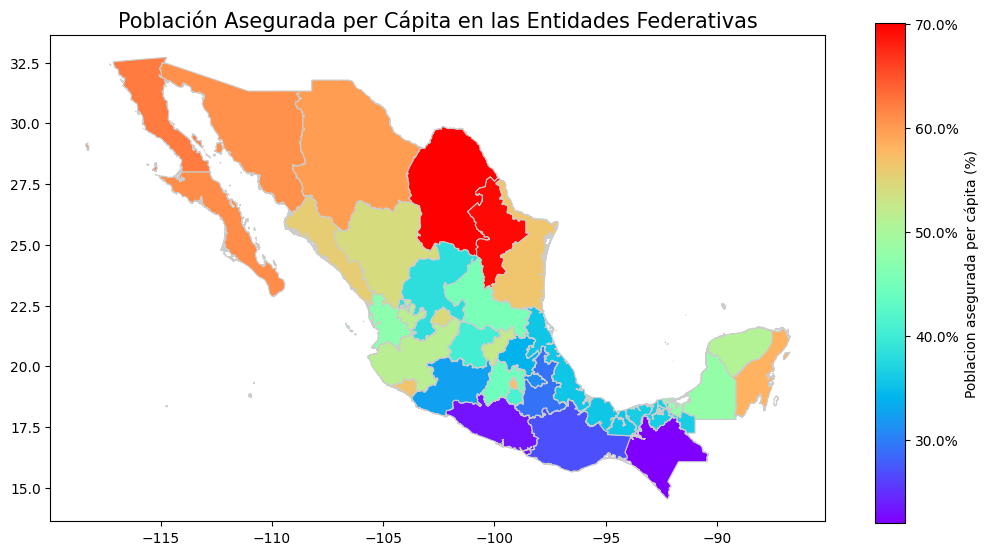

In [19]:
# Crear una nueva columna que represente la población asegurada per cápita
merged_data['Poblacion asegurada per capita'] = merged_data['Poblacion asegurada'] / merged_data['Poblacion']

# Seleccionar la nueva columna para el mapa
column_to_plot = 'Poblacion asegurada per capita'

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.95, 0.25, 0.03, 0.5])  # Ajustar el tamaño de la barra de color
mapa = merged_data.plot(column=column_to_plot, cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Añadir un formateador a la barra de color para mostrar como porcentaje
colorbar = mapa.get_figure().colorbar(mapa.collections[0], cax=cax)
colorbar.set_label('Poblacion asegurada per cápita (%)')
colorbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.1f}%'))

# Añadir título
ax.set_title('Población Asegurada per Cápita en las Entidades Federativas', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar el mapa
plt.show()

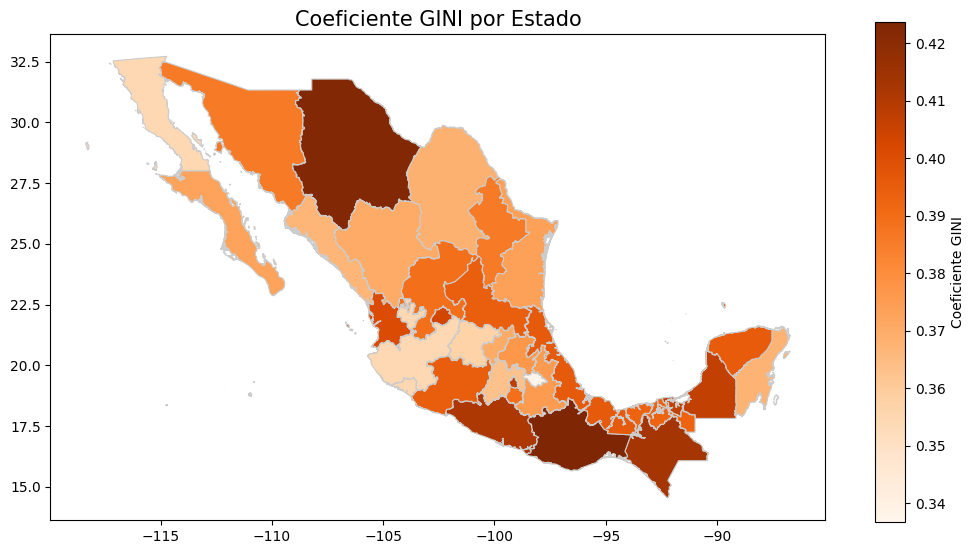

In [20]:
# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.95, 0.25, 0.03, 0.5])  # Ajustar el tamaño de la barra de color
mapa = merged_data.plot(column="Coeficiente GINI", cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Añadir un formateador a la barra de color para mostrar millones (M)
colorbar = mapa.get_figure().colorbar(mapa.collections[0], cax=cax)
colorbar.set_label('Coeficiente GINI')

# Añadir título
ax.set_title('Coeficiente GINI por Estado', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar el mapa
plt.show()

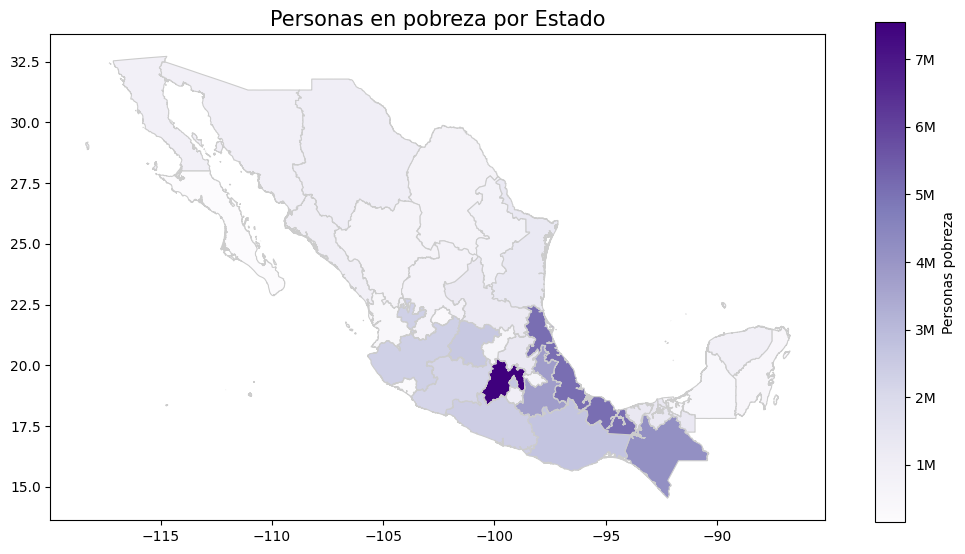

In [21]:
# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.95, 0.25, 0.03, 0.5])  # Ajustar el tamaño de la barra de color
mapa = merged_data.plot(column='Personas pobreza', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Añadir un formateador a la barra de color para mostrar millones (M)
colorbar = mapa.get_figure().colorbar(mapa.collections[0], cax=cax)
colorbar.set_label('Personas pobreza')
colorbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

# Añadir título
ax.set_title('Personas en pobreza por Estado', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar el mapa
plt.show()

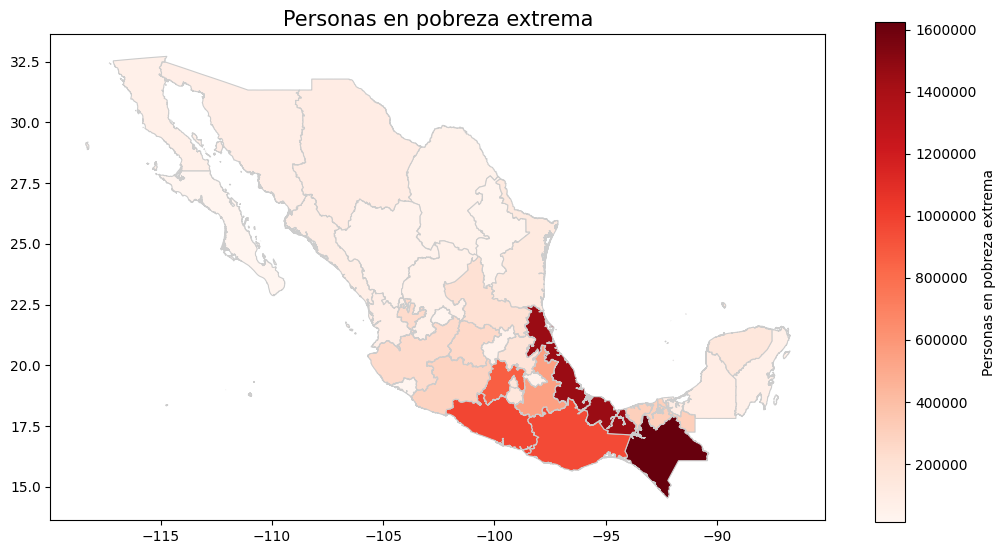

In [22]:
# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.95, 0.25, 0.03, 0.5])  # Ajustar el tamaño de la barra de color
mapa = merged_data.plot(column="Personas en pobreza extrema", cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Añadir un formateador a la barra de color para mostrar millones (M)
colorbar = mapa.get_figure().colorbar(mapa.collections[0], cax=cax)
colorbar.set_label('Personas en pobreza extrema')
colorbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1)}'))

# Añadir título
ax.set_title('Personas en pobreza extrema', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar el mapa
plt.show()